In [1]:
import pandas as pd
import datetime
from datetime import time as dt
import matplotlib.pyplot as plt

In [2]:
import gc
gc.collect()

7

In [3]:
#mydatapath="yellow_tripdata_2018-01.csv"
#this function to read month's data
def data_aggregator(path,columnnumber,chunksize):
    df_list = []
    for chunk in pd.read_csv(path,usecols=columnnumber, chunksize=chunksize):
        df_list.append(pd.DataFrame(chunk).dropna())
    result = pd.concat(df_list)
    del df_list
    return result

In [4]:
import requests
from bs4 import BeautifulSoup
page = requests.get("https://github.com/CriMenghini/ADM-2018/blob/master/Homework_2/taxi_zone_lookup.csv")
soup = BeautifulSoup(page.content, 'html.parser')
ids=[]
bor=[]
zon=[]
srv_zon=[]
cell=0
for i in range(2,1327,5):    #FIRSTLY We get all the location ids
    a=soup.find_all('td')[i].get_text()  
    ids.append(a)
    cell=cell+1
    
cell=0
for i in range(3,1328,5):    #Then all the boroughs
    a=soup.find_all('td')[i].get_text()
    bor.append(a)
    cell=cell+1
    
cell=0
for i in range(4,1329,5):   #After that we get all zones
    a=soup.find_all('td')[i].get_text()
    zon.append(a)
    cell=cell+1
cell=0
for i in range(5,1330,5):    #Finally we get all the seving zones
    a=soup.find_all('td')[i].get_text()
    srv_zon.append(a)
    cell=cell+1
# after getting all the informations needed we merged all the lists together
data_tuples = list(zip(ids,bor,zon,srv_zon))

In [5]:
boroghFrame=pd.DataFrame(data_tuples,columns = ["PULocationID", "Borogh", "Zone", "srv_zon"])
boroghFrame['PULocationID']=boroghFrame['PULocationID'].apply(int)
boroghFrame=boroghFrame[boroghFrame.Borogh !='Unknown']
boroghFrame=boroghFrame[boroghFrame.Borogh !='EWR']
#this function to merge(join) two dataframes one of them the month's dataframe and second the borogh dataframe
def data_aggregator2(df1,df2,oncolumns,jointype):
    result = pd.merge(df1, boroghFrame, on=oncolumns,how=jointype)
    return result
#data_aggregator(df1,boroghFrame,['PULocationID'],"inner")

In [6]:
data_tuples=None
del data_tuples
ids=None
del ids
bor=None
del bor
zon=None
del zon
srv_zon=None
del srv_zon

In [7]:
gc.collect()

10

In [4]:
#RQ1
JanData="yellow_tripdata_2018-01.csv"
FebData="yellow_tripdata_2018-02.csv"
MarData="yellow_tripdata_2018-03.csv"
AprData="yellow_tripdata_2018-04.csv"
MayData="yellow_tripdata_2018-05.csv"
JunData="yellow_tripdata_2018-06.csv"

RESEARCH QUESTION 2
With the answer of this question we will find out the time slots where taxis have more passengers. We set our time slots as one hour and proceed to the analysis for each borough. 

In [15]:
#RQ2
JanDF=data_aggregator(JanData,[1,3,7],10000)

In [16]:
JanBoroghData=data_aggregator2(JanDF,boroghFrame,['PULocationID'],"inner")

In [17]:
JanDF=None
del JanDF

In [18]:
JanBoroghData['tpep_pickup_datetime']=pd.to_datetime(JanBoroghData['tpep_pickup_datetime']).dt.hour

In [19]:
JanBoroghDF=pd.DataFrame(columns=['hour','borogh','passenger'])

In [20]:
JanBoroghDF['hour']=JanBoroghData['tpep_pickup_datetime']
JanBoroghDF['borogh']=JanBoroghData['Borogh']
JanBoroghDF['passenger']=JanBoroghData['passenger_count']

In [21]:
JanBoroghData=None
del JanBoroghData

In [54]:
JanBoroghSlots=JanBoroghDF.groupby(['borogh','hour']).sum()

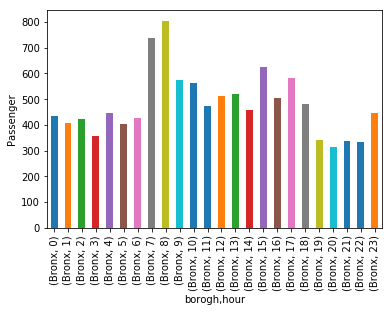

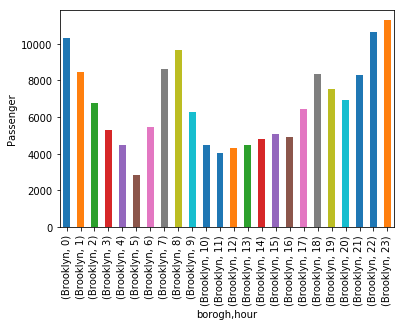

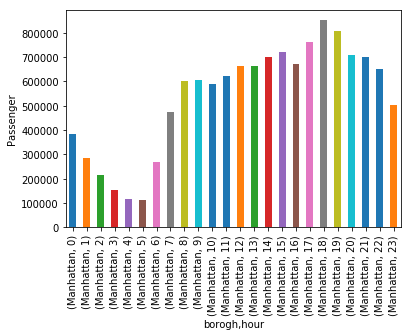

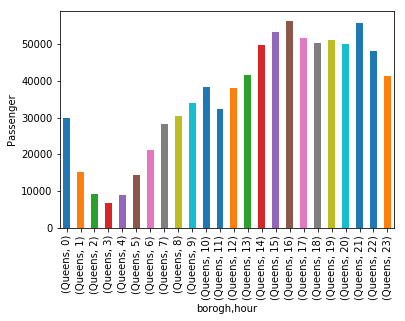

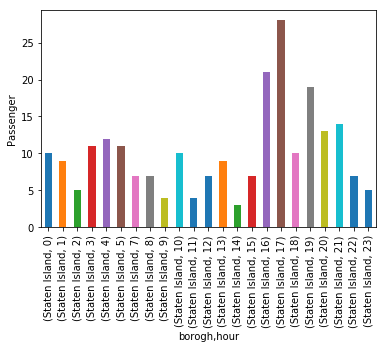

In [56]:
for i in range(5):
    JanBoroghSlots['passenger'][i*24:(i+1)*24].plot(kind='bar')
    plt.ylabel('Passenger')
    plt.show()
    plt.close()


In [70]:
FebDF=data_aggregator(FebData,[1,3,7],10000)

In [71]:
FebBoroghData=data_aggregator2(FebDF,boroghFrame,['PULocationID'],"inner")

In [72]:
FebDF=None
del FebDF

In [73]:
FebBoroghData['tpep_pickup_datetime']=pd.to_datetime(FebBoroghData['tpep_pickup_datetime']).dt.hour

In [74]:
FebBoroghDF=pd.DataFrame(columns=['hour','borogh','passenger'])

In [75]:
FebBoroghDF['hour']=FebBoroghData['tpep_pickup_datetime']
FebBoroghDF['borogh']=FebBoroghData['Borogh']
FebBoroghDF['passenger']=FebBoroghData['passenger_count']

In [76]:
FebBoroghData=None
del FebBoroghData

In [77]:
FebBoroghSlots=FebBoroghDF.groupby(['borogh','hour']).sum()

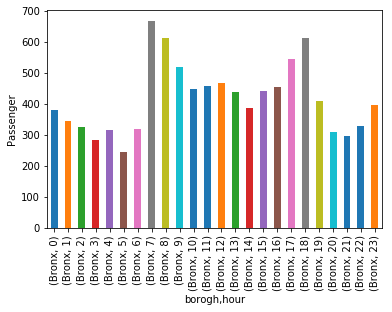

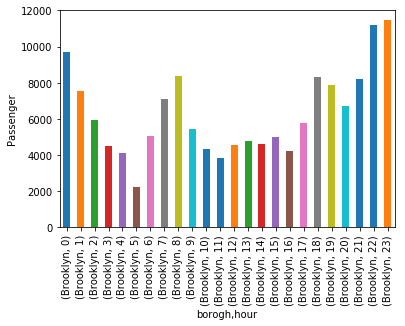

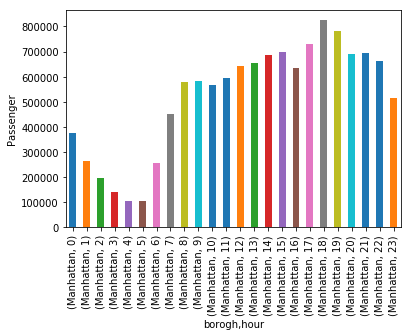

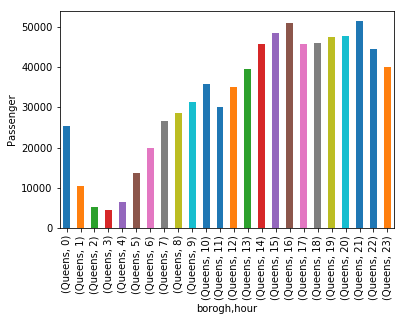

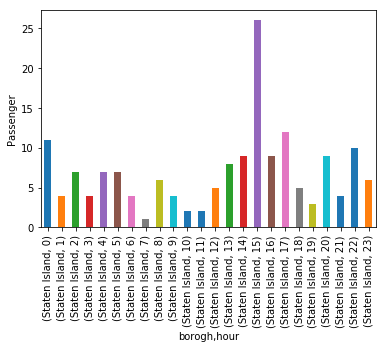

In [78]:
for i in range(5):
    FebBoroghSlots['passenger'][i*24:(i+1)*24].plot(kind='bar')
    plt.ylabel('Passenger')
    plt.show()
    plt.close()

In [59]:
FebBoroghSlots=None
del FebBoroghSlots

In [60]:
MarDF=data_aggregator(MarData,[1,3,7],10000)

In [61]:
MarBoroghData=data_aggregator2(MarDF,boroghFrame,['PULocationID'],"inner")

In [62]:
MarDF=None
del MarDF

In [63]:
MarBoroghData['tpep_pickup_datetime']=pd.to_datetime(MarBoroghData['tpep_pickup_datetime']).dt.hour

In [64]:
MarBoroghDF=pd.DataFrame(columns=['hour','borogh','passenger'])

In [65]:
MarBoroghDF['hour']=MarBoroghData['tpep_pickup_datetime']
MarBoroghDF['borogh']=MarBoroghData['Borogh']
MarBoroghDF['passenger']=MarBoroghData['passenger_count']


In [66]:
MarBoroghDara=None
del MarBoroghData

In [67]:
MarBoroghSlots=MarBoroghDF.groupby(['borogh','hour']).sum()


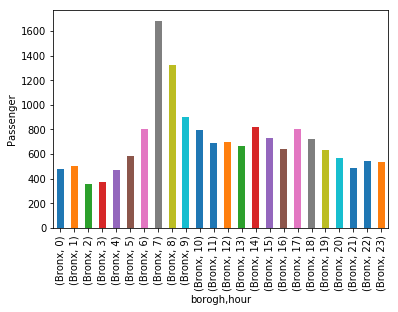

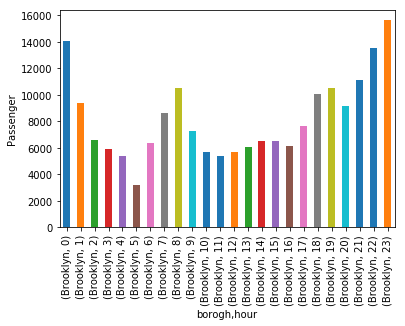

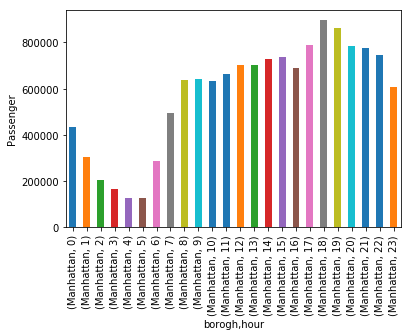

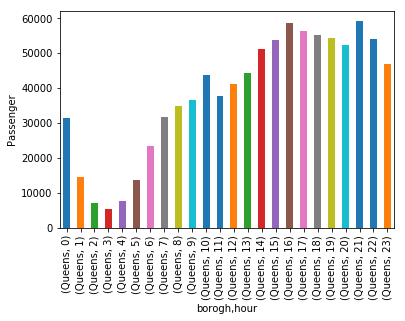

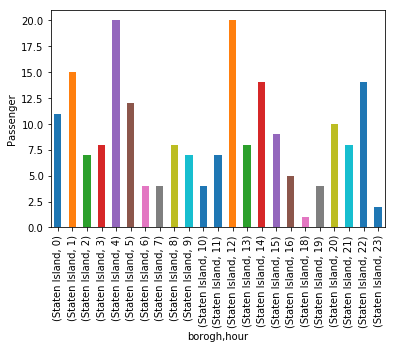

In [68]:
for i in range(5):
    MarBoroghSlots['passenger'][i*24:(i+1)*24].plot(kind='bar')
    plt.ylabel('Passenger')
    plt.show()
    plt.close()

In [ ]:
"""MarBoroghSlots['passenger'][0:].plot(kind='bar')
plt.ylabel('Passenger')
plt.show()
plt.close()"""


In [79]:
MarBoroghData=None
del MarBoroghData

In [80]:
gc.collect()

13124

In [81]:
AprDF=data_aggregator(MayData,[1,3,7],10000)

In [82]:
AprBoroghData=data_aggregator2(AprDF,boroghFrame,['PULocationID'],"inner")

In [85]:
AprDF=None
del AprDF

In [86]:
AprBoroghData['tpep_pickup_datetime']=pd.to_datetime(AprBoroghData['tpep_pickup_datetime']).dt.hour

In [87]:
AprBoroghDF=pd.DataFrame(columns=['hour','borogh','passenger'])

In [88]:
AprBoroghDF['hour']=AprBoroghData['tpep_pickup_datetime']
AprBoroghDF['borogh']=AprBoroghData['Borogh']
AprBoroghDF['passenger']=AprBoroghData['passenger_count']


In [89]:
AprBoroghData=None
del AprBoroghData

In [90]:
AprBoroghSlots=AprBoroghDF.groupby(['borogh','hour']).sum()

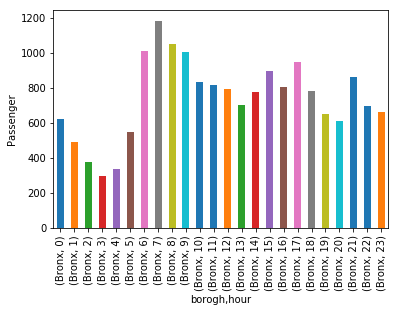

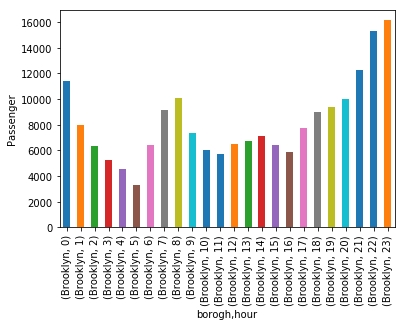

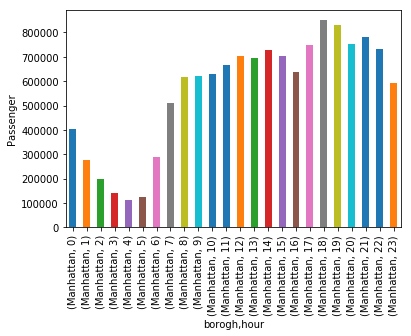

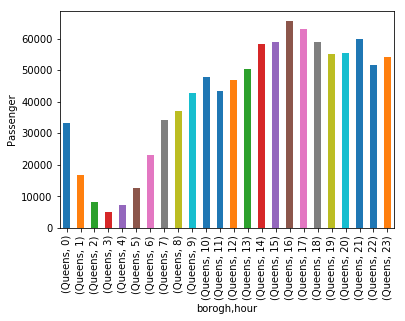

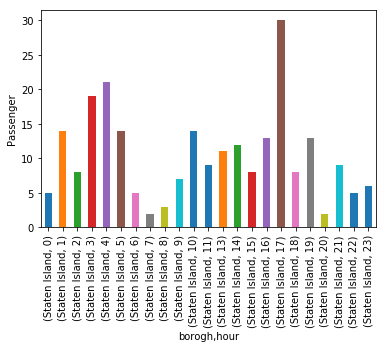

In [91]:
for i in range(5):
    AprBoroghSlots['passenger'][i*24:(i+1)*24].plot(kind='bar')
    plt.ylabel('Passenger')
    plt.show()
    plt.close()


In [92]:
MayDF=data_aggregator(MayData,[1,3,7],10000)

In [93]:
MayBoroghData=data_aggregator2(MayDF,boroghFrame,['PULocationID'],"inner")

In [94]:
MayDF=None
del MayDF

In [95]:
MayBoroghData['tpep_pickup_datetime']=pd.to_datetime(MayBoroghData['tpep_pickup_datetime']).dt.hour

In [96]:
MayBoroghDF=pd.DataFrame(columns=['hour','borogh','passenger'])

In [97]:
MayBoroghDF['hour']=MayBoroghData['tpep_pickup_datetime']
MayBoroghDF['borogh']=MayBoroghData['Borogh']
MayBoroghDF['passenger']=MayBoroghData['passenger_count']

In [98]:
MayBoroghData=None
del MayBoroghData

In [99]:
MayBoroghSlots=MayBoroghDF.groupby(['borogh','hour']).sum()

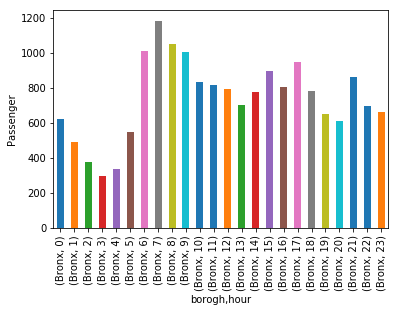

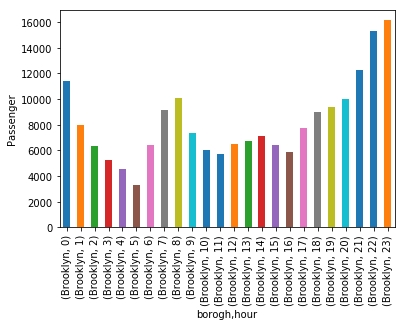

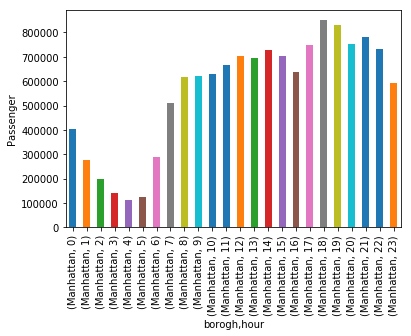

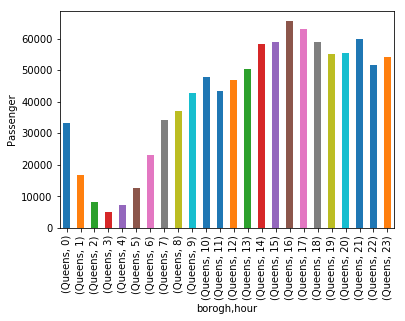

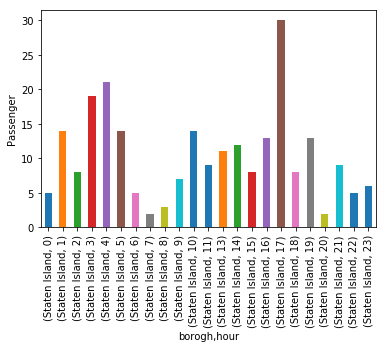

In [100]:
for i in range(5):
    MayBoroghSlots['passenger'][i*24:(i+1)*24].plot(kind='bar')
    plt.ylabel('Passenger')
    plt.show()
    plt.close()

In [106]:
JunDF=data_aggregator(JunData,[1,3,7],10000)

In [107]:
JunBoroghData=data_aggregator2(JunDF,boroghFrame,['PULocationID'],"inner")

In [108]:
JunDF=None
del JunDF

In [109]:
JunBoroghData['tpep_pickup_datetime']=pd.to_datetime(JunBoroghData['tpep_pickup_datetime']).dt.hour

In [110]:
JunBoroghDF=pd.DataFrame(columns=['hour','borogh','passenger'])

In [111]:
JunBoroghDF['hour']=JunBoroghData['tpep_pickup_datetime']
JunBoroghDF['borogh']=JunBoroghData['Borogh']
JunBoroghDF['passenger']=JunBoroghData['passenger_count']

In [112]:
JunBoroghData=None
del JunBoroghData

In [113]:
JunBoroghSlots=JunBoroghDF.groupby(['borogh','hour']).sum()

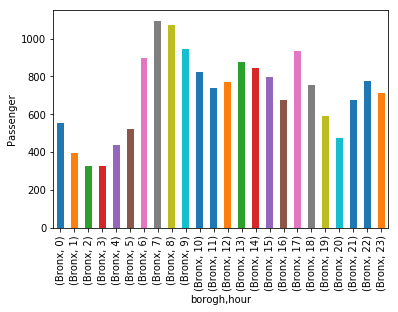

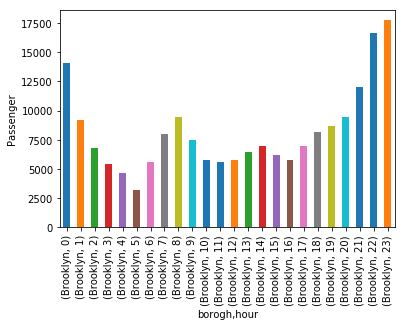

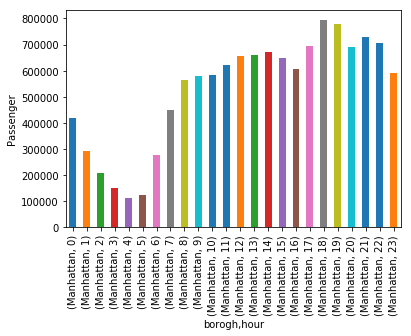

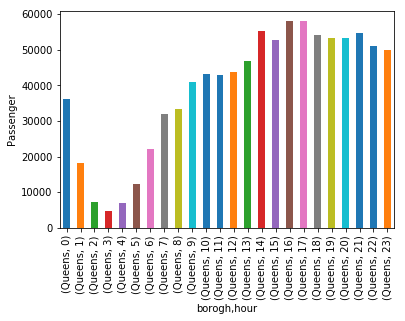

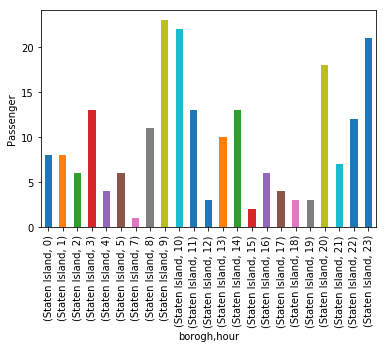

In [114]:
for i in range(5):
    JunBoroghSlots['passenger'][i*24:(i+1)*24].plot(kind='bar')
    plt.ylabel('Passenger')
    plt.show()
    plt.close()

After the plotting for each month we make some statements for each borough.
We start from Manhattan.

  MANHATTAN

We can easily see that here the slot with more passengers is the one of 6 pm, since people come back from work and take cabs for going back home. We can also make a prediction in this case, because even if there is some event in Manhattan, the percent or people coming back from work will be more than others. So the prediction we can make is that during the year the distribution of the slot with more passenger is costant and around 6 pm for this borough.

 BRONX

From the plots for each month in Bronx we say that the slot with more passengers is 7 am , so the opposite situation from Manhattan, because people go out from home to work at that time and take a cab to reach work. We can say that also because January is the only month with the slot with more passengers is 8 am and this must be related to the fact that is holiday so there are people who do not have to go to work. We can estimate also in this case that the average slot with more passengers is 7 am, because it could change around a hour more but will remain arount that value.

  BROOKLYN


Given the fact that Brooklyn is a 'young' borough, it seems normal to us to have the slot with more passengers corresponding to 11 pm. People use taxis in Brooklyn to get home after hanging out, according to the average age of the people leaving in Brooklyn. If we look to statistics, people between 18 and 44 years old represent almost the 60%. So also in this case, given the values we found out, we can easily say that during all year the time slot would remain the same.

   QUEENS
 
 Taking into account that Queens is the largest and most ethnically different borough, we expect different time slots and not a precise value. In fact, for January,April and June we have 4 pm, for May we have 5 pm and for February and March we have 9 pm.
 
 STATEN ISLAND
 
 We got the most interesting values from this borough because it is the only case where there is an excursion on time slots. In January,April and May we have that the slot with more passengers is 5 pm, in February it is 3 pm m in March it's 12 am and in June is 9 am. This is interesting because we notice that the values change so much because the borough it the most suburban one so people have different habits and also considering that tourists go from other boroughs to this one, we can say we have realistic values



RESEARCH QUESTION 2 GENERAL CASE


In [5]:
JanDF=data_aggregator(JanData,[1,3],10000)

In [6]:
JanDF['tpep_pickup_datetime']=pd.to_datetime(JanDF['tpep_pickup_datetime']).dt.hour

In [7]:
JanDaily=pd.DataFrame(columns=['hour','passenger'])
JanDaily['hour']=JanDF['tpep_pickup_datetime']
JanDaily['passenger']=JanDF['passenger_count']


In [8]:
JunDF=None
del JanDF

In [10]:
JanDailySlots=JanDaily.groupby(['hour']).sum()

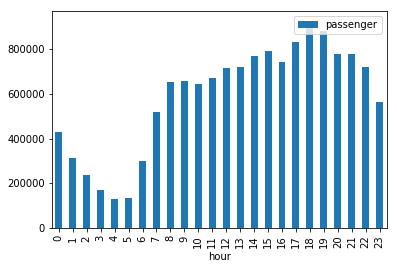

In [121]:
JanDailySlots.plot(kind='bar')
plt.legend(loc='upper right')
plt.show()
plt.close()


In [9]:
FebDF=data_aggregator(FebData,[1,3],10000)

In [10]:
FebDF['tpep_pickup_datetime']=pd.to_datetime(FebDF['tpep_pickup_datetime']).dt.hour

In [11]:
FebDaily=pd.DataFrame(columns=['hour','passenger'])
FebDaily['hour']=FebDF['tpep_pickup_datetime']
FebDaily['passenger']=FebDF['passenger_count']


In [12]:
FebDF=None
del FebDF

In [17]:
FebDailySlots=FebDaily.groupby(['hour']).sum()

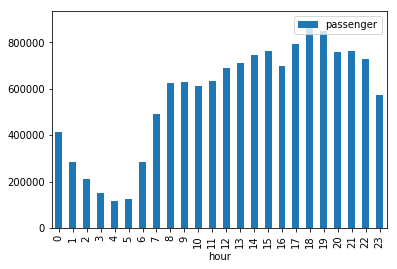

In [129]:
FebDailySlots.plot(kind='bar')
plt.legend(loc='upper right')
plt.show()
plt.close()


In [13]:
MarDF=data_aggregator(MarData,[1,3],10000)

In [14]:
MarDF['tpep_pickup_datetime']=pd.to_datetime(MarDF['tpep_pickup_datetime']).dt.hour

In [15]:
MarDaily=pd.DataFrame(columns=['hour','passenger'])
MarDaily['hour']=MarDF['tpep_pickup_datetime']
MarDaily['passenger']=MarDF['passenger_count']


In [16]:
MarDF=None
del MarDF

In [22]:
MarDailySlots=MarDaily.groupby(['hour']).sum()

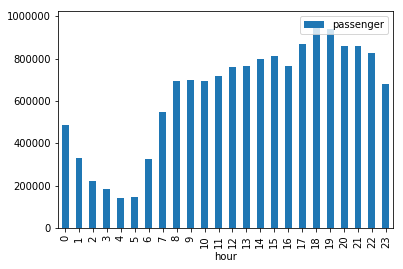

In [136]:
MarDailySlots.plot(kind='bar')
plt.legend(loc='upper right')
plt.show()
plt.close()


In [17]:
AprDF=data_aggregator(AprData,[1,3],10000)

In [18]:
AprDF['tpep_pickup_datetime']=pd.to_datetime(AprDF['tpep_pickup_datetime']).dt.hour

In [19]:
AprDaily=pd.DataFrame(columns=['hour','passenger'])
AprDaily['hour']=AprDF['tpep_pickup_datetime']
AprDaily['passenger']=AprDF['passenger_count']


In [20]:
AprDF=None
del AprDF

In [28]:
AprDailySlots=AprDaily.groupby(['hour']).sum()

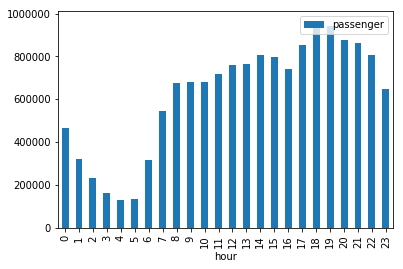

In [144]:
AprDailySlots.plot(kind='bar')
plt.legend(loc='upper right')
plt.show()
plt.close()


In [21]:
MayDF=data_aggregator(MayData,[1,3],10000)

In [22]:
MayDF['tpep_pickup_datetime']=pd.to_datetime(MayDF['tpep_pickup_datetime']).dt.hour

In [23]:
MayDaily=pd.DataFrame(columns=['hour','passenger'])
MayDaily['hour']=MayDF['tpep_pickup_datetime']
MayDaily['passenger']=MayDF['passenger_count']


In [24]:
MayDF=None
del MayDF

In [30]:
MayDailySlots=MayDaily.groupby(['hour']).sum()

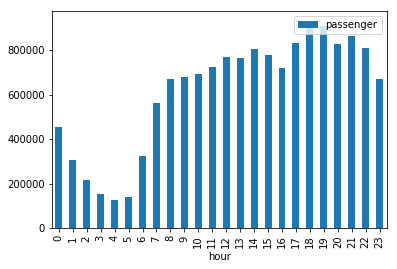

In [151]:
MayDailySlots.plot(kind='bar')
plt.legend(loc='upper right')
plt.show()
plt.close()


In [25]:
JunDF=data_aggregator(JunData,[1,3],10000)

In [26]:
JunDF['tpep_pickup_datetime']=pd.to_datetime(JunDF['tpep_pickup_datetime']).dt.hour

In [27]:
JunDaily=pd.DataFrame(columns=['hour','passenger'])
JunDaily['hour']=JunDF['tpep_pickup_datetime']
JunDaily['passenger']=JunDF['passenger_count']


In [28]:
JunDF=None
del JunDF

In [40]:
JunDailySlots=JunDaily.groupby(['hour']).sum()

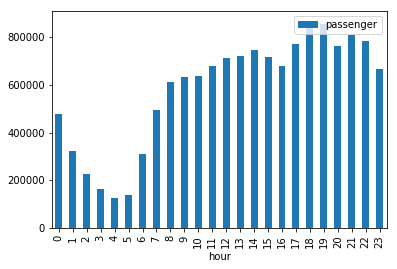

In [158]:
JunDailySlots.plot(kind='bar')
plt.legend(loc='upper right')
plt.show()
plt.close()


In [29]:
FullData=pd.concat([JanDaily,FebDaily,MarDaily,AprDaily,MayDaily,JunDaily])

In [30]:
FullDataSlots=FullData.groupby(['hour']).sum()

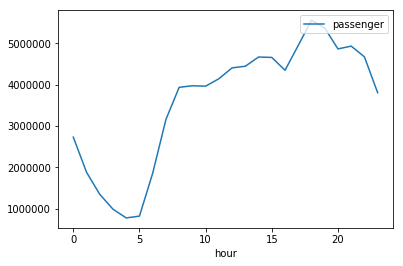

In [31]:
FullDataSlots.plot(kind='line')
plt.legend(loc='upper right')
plt.show()
plt.close()

Here in this plot for the general data we can see that the dominant time slot is the one between 5 pm and 8 pm , this shows us another time that Manhattan is the dominant variable in our analysis and also that in NYC taxis are used more in the evening than during the day.